# ESS 330 Final Project

Leona Myers (Colorado State University)  
Andie Hall (Colorado State University)

# Stage 2:

## Title

Title: Climate Change and Avian Response: Assessing the Effects of CO₂ and Temperature on Wood Thrush Populations

## Introduction, Background, and Motivation

Problem Overview: In recent decades, global climate change, driven by increased carbon dioxide emissions, has contributed to rising temperatures and disrupted ecological systems. Migratory bird species, Wood Thrush (Hylocichla mustelina), are particularly vulnerable to these changes due to their reliance on specific environmental cues for migration, breeding, and survival. The Wood Thursh is included on the Yellow Watch List for birds most at risk of extinction, and it is one of the most prominent examples of declining forest songbirds in North America (Cornell Lab of Orinithology). Populations have declined by 1.3% per year, resulting in a cumulative decline of approximately 5% between 1966 and 2019 (Cornell Lab of Ornithology). Declines in Wood Thrush populations have been observed across North America, yet the extent to which atmospheric CO2 levels and associated temperature changes contribute to these declines remains unclear.

Data Overview: This research will investigate the effects of rising atmospheric CO₂ concentrations and temperature changes on the population dynamics of the Wood Thrush (Hylocichla mustelina), a migratory songbird of conservation concern. The study will integrate climate and ecological data from multiple large-scale sources: temperature records from the National Weather Service, bird abundance and distribution data from eBird and the North American Breeding Bird Survey (BBS), and atmospheric CO₂ data from the Global Carbon Budget.

## Methods Overview:

1.  Data acquisition

    1.  Climate Data: National Weather Service

    2.  CO₂ Data: Global Carbon Budget

    3.  Bird Observation Data: Cornell Lab’s eBird dataset

2.  Data Cleaning and Processing

    1.  Imported 7 different datasets from the states above that recorded annual temperatures for each month between 1966 and 2019 and combined into one large dataset, “All_Weather_Data.csv” 

        1.  Difficulties: The data was extremely time-consuming to clean and process into a large dataset due to the website’s pdf format for data exports. Using Excel’s data from the file helped to import the data and allowed for processing and cleaning of the data before being inserted into the rProject data directory. 

    2.  CO2 data was downloaded from the Global Carbon Budget and then uploaded to Rstudio. No additional cleaning was needed.

        1.  Difficulties may arise from this data set only including annual emission while other data sets include monthly data.

    3.  Filtered Wood Thrush eBird data to between the years of 1966 and 2019, along with filtering the location of the bird to these specific states: Pennsylvania, West Virginia, Virginia, Kentucky, Ohio, Indiana, and Tennessee. “Wood_Thrush_Raw.csv”

        1.  Difficulties: The dataset is about 131.5 MB and cannot be uploaded to the git repository, meaning data sharing had to be done via email rather than sharing the actual repo for us to pull and push.

1.  Statistical Analysis

    1.  Using the multiple datasets to account for temperature, CO2, and observations, we created multiple machine learning models (Linear Regression and Random Forest) to identify the model of best fit. Creating a separate database to identify the first observations of the Wood Thrush per year with a correlation between the average temperature for that month of the year with the first observation of that year can help model the correlation between average temperatures and the arrival date the species. 

2.  Visualization

    1.  Creating plots for the relationship between CO2, Temperature, and Observations includes a scatter plot to identify where bird observations (based on DayofYear) align with average temperatures for specific time periods. 

## Citations

Cornell Lab of Ornithology. (n.d.). Wood Thrush Life History, All About Birds. All About Birds. Retrieved April 10, 2025, from https://www.allaboutbirds.org/guide/Wood_Thrush/lifehistory

## Exploring the Data

In [ ]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

here() starts at C:/Users/myersl3/OneDrive - Rensselaer Polytechnic Institute/Documents/leonamyers/github/Final-Project-330

CO2 data:

Description: The dataset spans 54 years, from 1966 to the most recent year available. Each entry includes the total CO₂ emissions for North America in a given year. No cleaning is needed.

In [ ]:
co2_data <- read_csv(here("data", "annual-co2-emissions-per-country.csv"))

Rows: 54 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): Entity
dbl (2): Year, Annual CO₂ emissions
lgl (1): Code

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

ℹ Please use `linewidth` instead.

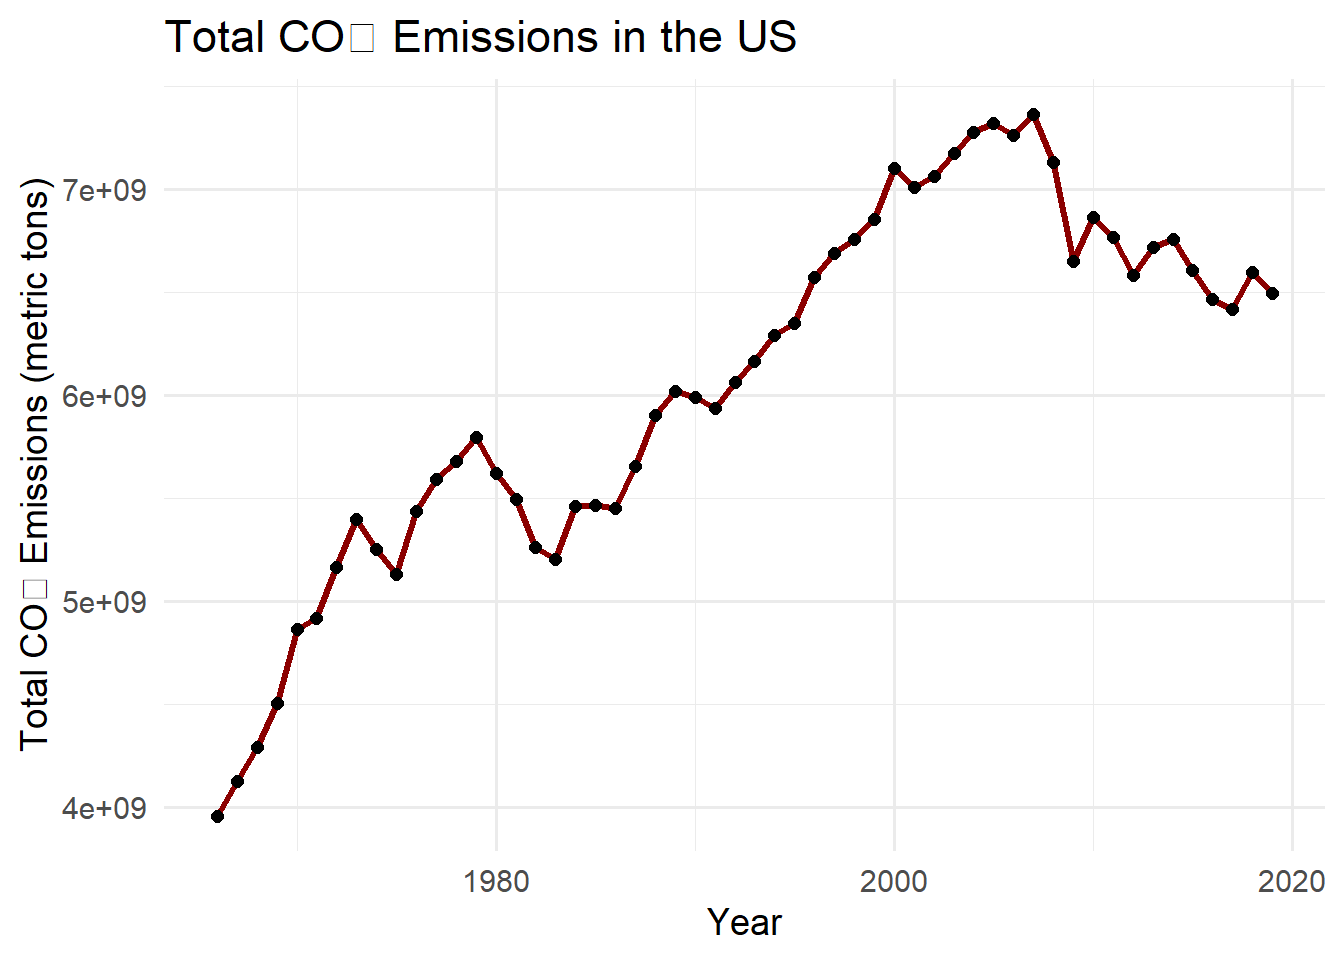

In [ ]:
ggplot(co2_data, aes(x = Year, y = `Annual CO₂ emissions`)) +
  geom_line(color = "darkred", size = 1.2) +
  geom_point(color = "black", size = 2) +
  labs(
    title = "Total CO₂ Emissions in the US",
    x = "Year",
    y = "Total CO₂ Emissions (metric tons)"
  ) +
  theme_minimal(base_size = 14)

### eBird Data:

Description: The data includes Woodthrush observations from the United States in Pennsylvania, West Virginia, Virginia, Kentucky, Ohio, Indiana, Tennessee, recorded at different levels of granularity. The observations span from 1966 to 2019. There is additional information on the number of individuals observed, location, and behavioral codes. Some cleaning was done to filter for specific locations.

In [ ]:
woodthrush_data <- read_csv(here("data", "Wood_Thrush.csv"))

New names:
Rows: 301512 Columns: 27
── Column specification
──────────────────────────────────────────────────────── Delimiter: "," chr
(6): COUNTRY, COUNTRY CODE, STATE, COUNTY, OBSERVATION COUNT, OBSERVATI... dbl
(2): LATITUDE, LONGITUDE lgl (19): ...6, ...10, ...11, ...12, ...13, ...14,
...15, ...16, ...17, ...1...
ℹ Use `spec()` to retrieve the full column specification for this data. ℹ
Specify the column types or set `show_col_types = FALSE` to quiet this message.
• `` -> `...6`
• `` -> `...10`
• `` -> `...11`
• `` -> `...12`
• `` -> `...13`
• `` -> `...14`
• `` -> `...15`
• `` -> `...16`
• `` -> `...17`
• `` -> `...18`
• `` -> `...19`
• `` -> `...20`
• `` -> `...21`
• `` -> `...22`
• `` -> `...23`
• `` -> `...24`
• `` -> `...25`
• `` -> `...26`
• `` -> `...27`

In [ ]:
library(dplyr)
library(lubridate)

woodthrush_yearly <- woodthrush_data %>%
  mutate(
    observation_date = mdy(`OBSERVATION DATE`),  
    year = year(observation_date),
    `OBSERVATION COUNT` = as.numeric(`OBSERVATION COUNT`)  
  ) %>%
  group_by(year) %>%
  summarize(total_observations = sum(`OBSERVATION COUNT`, na.rm = TRUE))

ℹ In argument: `OBSERVATION COUNT = as.numeric(`OBSERVATION COUNT`)`.
Caused by warning:
! NAs introduced by coercion

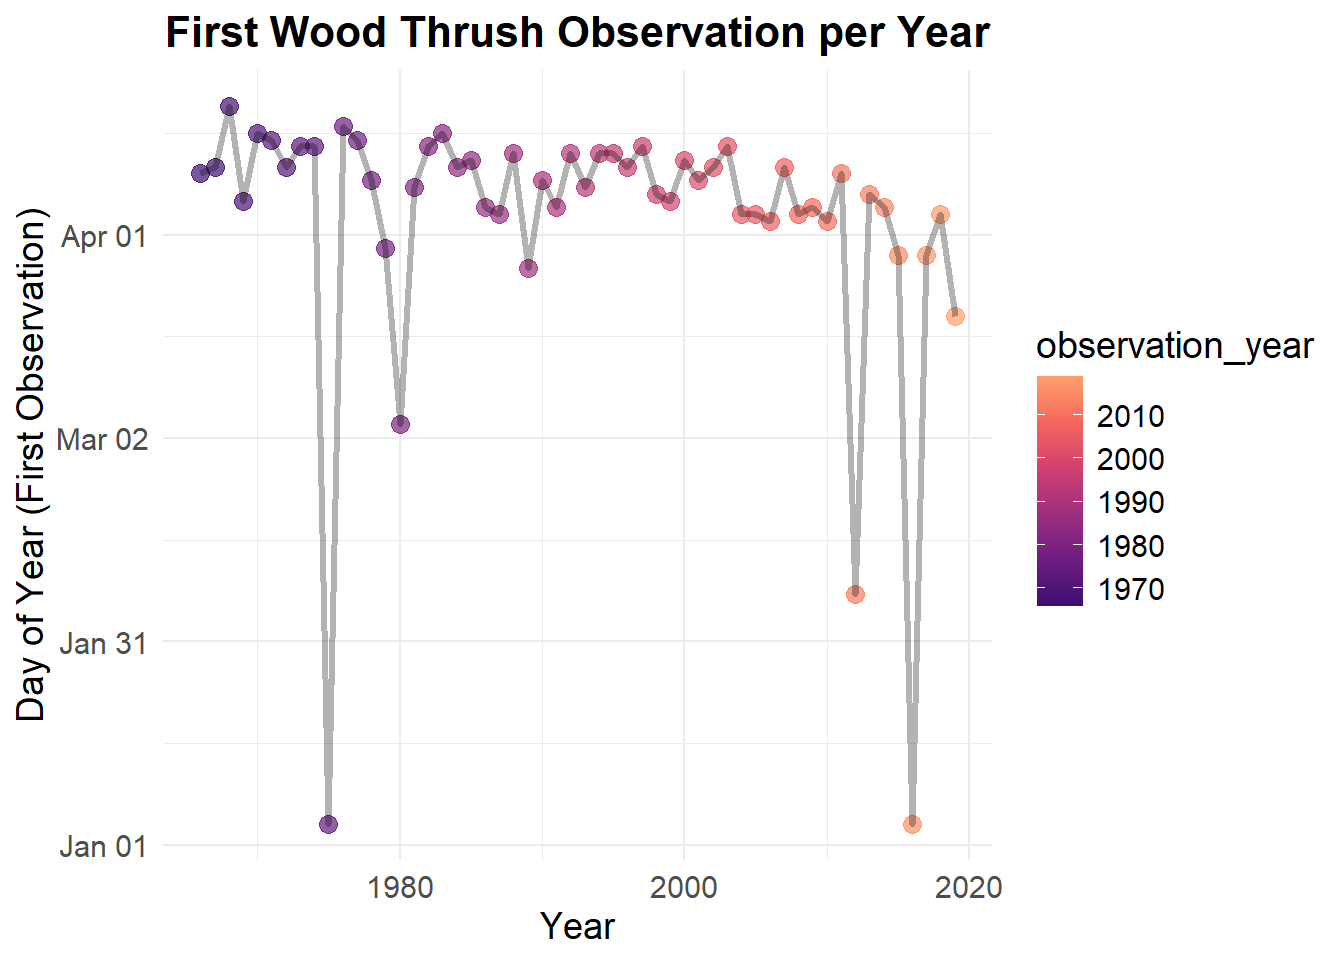

In [ ]:
first_observation <- woodthrush_data %>%
  mutate(
    observation_date = mdy(`OBSERVATION DATE`),  
    observation_year = year(observation_date)
  ) %>%
  group_by(observation_year) %>%
  slice_min(observation_date, with_ties = FALSE) %>%
  mutate(
    DayOfYear = yday(observation_date)
  )

ggplot(first_observation, aes(x = observation_year, y = DayOfYear)) +
  geom_point(aes(color = observation_year), size = 3, alpha = 0.7) +
  geom_line(color = "black", alpha = 0.3, size = 1.2) + 
  scale_color_viridis_c(option = "magma", begin = 0.2, end = 0.8) + 
  scale_y_continuous(
    breaks = seq(0, 365, by = 30),
    labels = function(x) format(as.Date(x, origin = "1970-01-01"), "%b %d")
  ) +
  labs(
    x = "Year", 
    y = "Day of Year (First Observation)", 
    title = "First Wood Thrush Observation per Year"
  ) +
  theme_minimal() +
  theme(
    legend.position = "right", 
    text = element_text(size = 14), 
    plot.title = element_text(size = 16, face = "bold", hjust = 0.5)
  )

#### Test: Linear Regression

In [ ]:
model <- lm(DayOfYear ~ observation_year, data = first_observation)
summary(model)


Call:
lm(formula = DayOfYear ~ observation_year, data = first_observation)

Residuals:
    Min      1Q  Median      3Q     Max 
-94.378   1.369   5.287   8.700  13.841 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)  
(Intercept)      677.1175   357.3052   1.895   0.0636 .
observation_year  -0.2935     0.1793  -1.637   0.1077  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 20.54 on 52 degrees of freedom
Multiple R-squared:  0.04901,   Adjusted R-squared:  0.03072 
F-statistic:  2.68 on 1 and 52 DF,  p-value: 0.1077

Results: The analysis suggests a slight trend toward Wood Thrushes arriving slightly earlier over time (about 0.29 days per year), but this trend is not statistically significant (p = 0.1077).

### Climate/Weather Data:

Description: This data set contains the annual average temperature records for the states of Pennsylvania, West Virginia, Virginia, Kentucky, Ohio, Indiana, and Tennessee, from 1966-2019. It includes monthly temperature data for each year, from January through December, along with an annual average temperature. This data set was heavily cleaned in excel.

In [ ]:
weather_data <-  read_csv(here("data", "AllWeatherData.csv"))

Rows: 378 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): STATE
dbl (14): Year, Jan, Feb, Mar, Apr, May, Jun, Jul, Aug, Sep, Oct, Nov, Dec, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

#### Test: linear regression

In [ ]:
library(dplyr)
library(tidyr)
library(ggplot2)

weather_long <- weather_data %>%
  pivot_longer(
    cols = Jan:Dec,
    names_to = "Month",
    values_to = "Temp"
  ) %>%
  mutate(
    Month = factor(Month, levels = month.abb),
    Year = as.numeric(Year),
    Temp = as.numeric(Temp)
  )
temp_trend <- lm(Temp ~ Year, data = weather_long)
summary(temp_trend)


Call:
lm(formula = Temp ~ Year, data = weather_long)

Residuals:
   Min     1Q Median     3Q    Max 
-44.20 -15.85  -1.25  13.18 760.29 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)   
(Intercept) -149.17947   71.54617  -2.085  0.03712 * 
Year           0.10297    0.03591   2.868  0.00415 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 37.69 on 4534 degrees of freedom
Multiple R-squared:  0.001811,  Adjusted R-squared:  0.00159 
F-statistic: 8.224 on 1 and 4534 DF,  p-value: 0.004152

Results: Our results indicate a statistically significant warming trend over time, with temperatures increasing by ~0.10 degrees per year.